# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Logit/sigmoid function

Logistic regression is a baseline supervised algorithm for solving classification problem where outcome (target) is discrete.   The idea behind is that $\boldsymbol{\theta}^T\mathbf{x}$ will return a continous value and thus may not be suitable for classification task.  However, if we can find one function $g$ such that

$$g(\boldsymbol{\theta}^T\mathbf{x}) \in \{0, 1\}$$

then we can define our hypothesis function as $g$ and optimize accordingly based on some loss function.

It happens that $g$ (and also our hypothesis function h) can be defined as the sigmoid (logit) function as the following:

$$ h = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

**Note:  e is also known as the Euler's number**

**Note: don't worry if you don't know what is a sigmoid function.  It is just some function that magically maps any value to value between 0 to 1.**

**Trivials**: 
$e$ is a really convenient number for math, for example whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.  Also, $e^x$ always give you positive numbers, thus it is no surprise this $e$ was often used in probability/statistics.  Last, it is convenient to apply $\log$ in any optimization problem including $e$ since it will cancel it nicely and will also not change the optimization answer since $\log$ is monotically increasing.  Btw, the common log base we use in natural log, but it really does not matter because the base is merely a constant.

Let's see how does it look in code:

Text(0, 0.5, 'y')

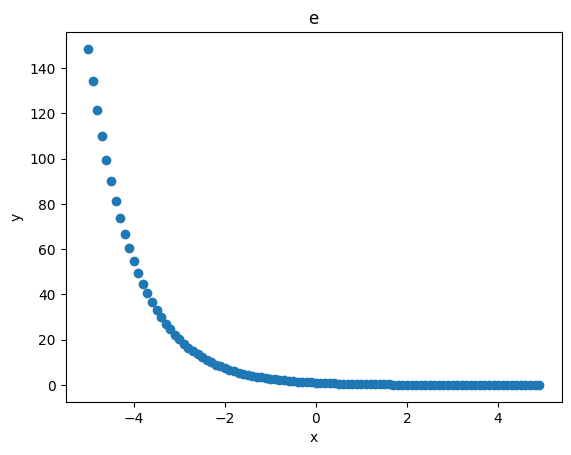

In [2]:
euler = lambda x: np.exp(-x)
x = np.arange(-5,5,0.1)
y = euler(x)

# Plot the sigmoid
plt.scatter(x, y)
plt.title('e')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

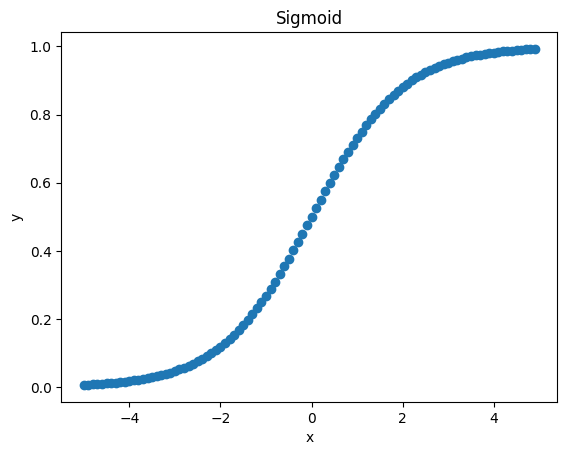

In [3]:
# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)

# Plot the sigmoid
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')

Hmm...but the range of output is a continuous value between 0 and 1.  Well, we can simply round up/down to get either 0 or 1.

## Derivative

Recall the derivative using quotient rule is        

$$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$

Given sigmoid function as

$$ g(x) = \frac{1}{1+e^{-x}} $$

Thus the derivative of sigmoid function is

$$
\begin{aligned}
    \frac{dg}{dx} &= \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    &= g(1 - g)
\end{aligned}
$$

**Note: once again, don't worry if you don't understand derivative very well.  The key here is just to be reminded that derivative is important for us to do gradient descent, ok?**

Let's look at the gradient by modifying our sigmoid function a little bit.

Text(0, 0.5, 'y')

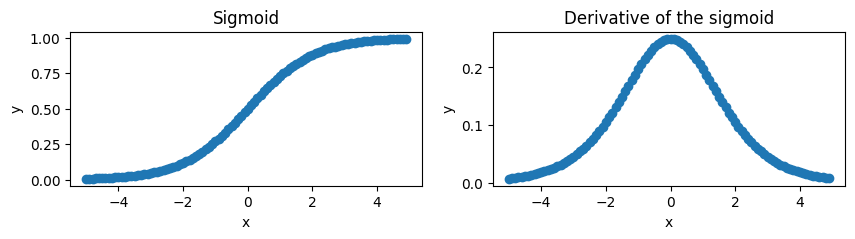

In [4]:
# Formula:
# g(x) = 1 / (1 + np.exp(-x))

# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x, deriv = False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, the greatest gradient possible is 0.25.  Thus it means that in a gradient descent update, the update speed will be restricted by this value.

## Example

So if we had the following function

$$ \boldsymbol{\theta}^T\mathbf{x} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $$

Given some point ($x_{1}$,$x_{2}$), if we plugged it to our sigmoid function, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

For example, given ($x_{1} = 3$, $x_{2} = 4$) and ($\theta_{1}$ = 1, $\theta_{2}$ = 2) (let's ignore $\theta_{0}$ for simplicity), the following code performs a sigmoid of $\boldsymbol{\theta}^T\mathbf{x}$

In [5]:
X = np.array([3, 4])
theta = np.array([1, 2])
print("theta^Tx:", X @ theta)
print("sigmoid of theta^Tx: ", sigmoid(X @ theta)) 
print("rounding for classification: ", np.round(sigmoid(X @ theta)))

theta^Tx: 11
sigmoid of theta^Tx:  0.999983298578152
rounding for classification:  1.0


Ok...now we learn sigmoid or the logit function.  Let's look at the loss function.

### Loss function for classification

Recall that we simply use the mean squared error for loss function in regression.  So what loss function to use in classification?

**Answer: binary cross-entropy**

$$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$

Before understanding, let's check whether it really works...

In [6]:
def cross_entropy_loss(y, h):
    loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return loss

In [7]:
y      = np.array([1, 1, 1, 0, 0, 0])
bad_h  = np.array([0.01, 0.01, 0.01, 0.99, 0.99, 0.99])  #<---very bad prediction
good_h = np.array([0.99, 0.99, 0.99, 0.01, 0.01, 0.01])  #<---very good prediction


print("bad h should give high loss: ", cross_entropy_loss(y, bad_h))
print("good h should give low loss: ", cross_entropy_loss(y, good_h))

bad h should give high loss:  27.631021115928544
good h should give low loss:  0.060302015121008704


It works!  How?  To understand, you need to understand the behavior or $\log$.

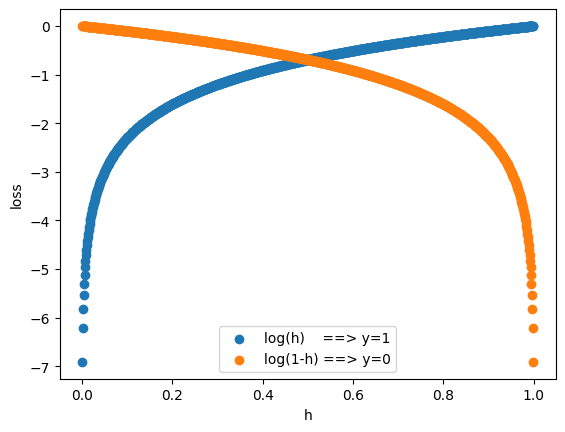

In [8]:
h = np.linspace(0.001, 0.999, 1000)

plt.scatter(h, np.log(h), label='log(h)    ==> y=1')
plt.scatter(h, np.log(1-h), label='log(1-h) ==> y=0')
plt.xlabel('h')
plt.ylabel('loss')

plt.legend()

Notice this behavior:

When y=1, 
- if h=1, loss is near 0.  
- if h=0.01, loss is very high

when y=0,
- if h=0, loss is near 0.  
- if h=0.99, loss is very high

## Gradient of binary cross entropy

Recall that we need to find the gradient of the loss function in order to use gradient descent.

Calculating is easy. To make thing easy, let's imagine one training sample. Recall that 

$$J = - (y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
$$h = \frac{1}{1+e^{-g}}$$
$$g = \boldsymbol{\theta}^T\mathbf{x}$$


Thus, gradient of $J$ in respect to some $\theta_j$ is

$$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      
where

$$\frac{\partial J}{\partial h} = \frac{h^{(i)} - 
y^{(i)}}{h^{(i)}(1-h^{(i)})}$$
$$\frac{\partial h}{\partial g} = h^{(i)}(1-h^{(i)})$$
$$\frac{\partial g}{\partial \theta_j} = x_j$$

Thus, 

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
&= \frac{h^{(i)} - y^{(i)}}{h^{(i)}(1-h^{(i)})} * h^{(i)}(1-h^{(i)}) * x_j\\
&= (h^{(i)} - y^{(i)})x_j\\
\end{aligned}$$

We can also write the gradient as matrix form:

$$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$
   
**Don't worry.  If you got lost here, just take it easy.  For now, you just need to know that why we need to find the gradient. You can also go home and try it slowly one time.  Just one time is enough to make you have faith.**

Now that we learn the logit function and the loss function, we are now ready to implement logistic regression!

## Binary Logistic Regression

Logistic regression is a binary **classification algorithm** by simply finding a best fitted line that separates two dataset.  In order to squash the output to a value between 0 and 1, logistic regression used a function called logit function (or sigmoid function)

### Implementation
    
1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the *cross entropy* defined as
    $$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
3. Calculate the gradient based on the loss
    $$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tolerance

### 1: Prepare your data

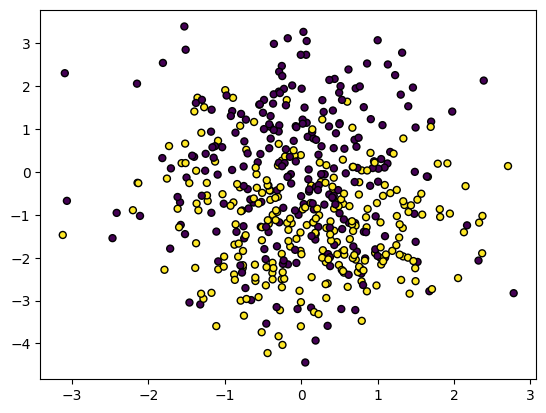

In [9]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# feature scaling helps reaching convergence faster
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#add intercepts
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

### 2: Fit your algorithm 

#### 2.1 Training

In [10]:
# here I use mini-batch as a demonstration
# you are free to use any variants of gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01

    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<----with replacement
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        loss, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Loss at iteration {i}", loss)
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    # putting negative sign for negative log likelihood
    loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return loss, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

Loss at iteration 0 24.26015131959808
Loss at iteration 500 17.259035247519737
Loss at iteration 1000 14.060040577765236
Loss at iteration 1500 19.554578498991415
Loss at iteration 2000 10.90627252066596
Loss at iteration 2500 0.12675312043854076
Loss at iteration 3000 12.392230296184227
Loss at iteration 3500 15.472827853568324
Loss at iteration 4000 11.696548916464627
Loss at iteration 4500 19.972518516649142


#### 2.2 Compute accuracy

In [11]:
yhat = output(h_theta(X_test, w))
yhat

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.78

## 3. Inference

Try to do this by yourself.

## When to Use Logistic Regression

Almost always, as a baseline though!  Logistic Regression make an assumption based on linearity and as long as your data is approximately linear, Logistic Regression work fantastic.  There are also some clear advantages:
- They are quite fast for both training and prediction
- They have very few (if any) tunable parameters
- Descent algorithms works well with Logistic Regression

The only problem of Logistic Regression lies on its limitation of linearity.  I would usually try Naive Bayesian, followed by Logistic Regression as baseline.  And if the accuracy is quite low, I would try other non-linear classification models such as SVM or KNN or Decision Tree.

## Group Workshop - Check your understandings

| | Egg price | Gold price    | Oil price   | Country Status   |
|---:|:------ |:-----------   |:------      |:------           |  
| 1  | 3      | 100           | 4           | Developed        | 
| 2  | 4      | 500           | 7           | Developing       | 
| 3  | 5      | 200           | 6           | Developing       |
| 4  | 6      | 300           | 8           | Developing       |
| 5  | 7      | 400           | 2           | Developed        |
| 6  | 8      | 250           | 1           | Developed        |

Answer the following questions:

Instruction:  Gather in your group.  Will randomly pick groups to present.

1.  Explain Logistic Regression and its relationship with regression in your own words.
2.  Explain why the cross entropy loss is defined like that (i.e., using $\log$).
3.  Go home and try to work out the gradient of logit/sigmoid function by hand.
4.  Go home and try to work out the gradient of binary cross entropy by hand.
5.  What's the maximum gradient that sigmoid/logit function can give you?  What does it imply?
6.  Given mini-batch gradient descent based on $(\mathbf{x}^{(2)}, \mathbf{x}^{(4)}, \mathbf{x}^{(5)})$, and using **Logistic regression** and $\theta = [2, 0.1, 3]$
    1.  What is $\mathbf{h}$
    2.  What is $J(\theta)$?
    3.  What is $\displaystyle \frac{\partial J}{\partial \theta_2}$
    4.  What is $\displaystyle \frac{\partial J}{\partial \theta}$
    5.  What would be the new theta?
7.  My code does not really adhere to class format, if you have time, go home and try to code this into class format.